In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 28, 28, 32)           320       ['input_5[0][0]']             
                                                                                                  
 conv2d_15 (Conv2D)          (None, 28, 28, 32)           320       ['input_6[0][0]']             
                                                                                            

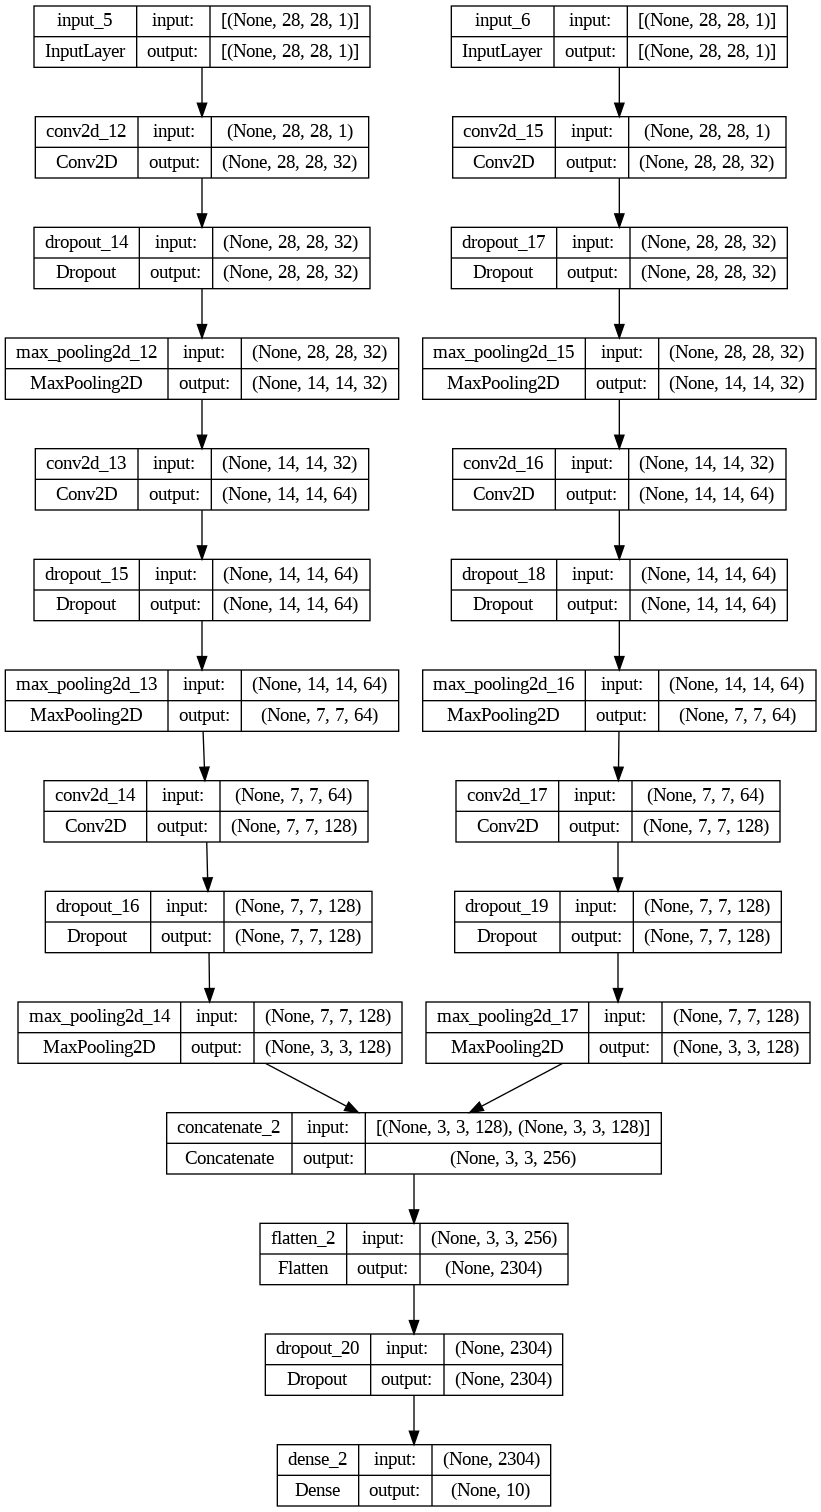

In [6]:
left_inputs = Input(shape = input_shape)
x = left_inputs
filters = n_filters

for i in range(3):
  x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same", activation = "relu")(x)
  x = Dropout(dropout)(x)
  x = MaxPooling2D()(x)
  filters *=2

right_inputs = Input(shape = input_shape)
y = right_inputs
filters = n_filters

for i in range(3):
  y = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same", activation = "relu", dilation_rate = 2)(y)
  y = Dropout(dropout)(y)
  y = MaxPooling2D()(y)
  filters *= 2

y = concatenate([x, y])
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation = "softmax")(y)


model = Model([left_inputs, right_inputs], outputs)
model.summary()
plot_model(model, show_shapes = True)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit([x_train, x_train], y_train, validation_data=([x_test, x_test], y_test), epochs=20, batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 253s 134ms/step - loss: 0.1735 - accuracy: 0.9454 - val_loss: 0.1205 - val_accuracy: 0.9887
Epoch 2/20
1875/1875 [==============================] - 247s 132ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0884 - val_accuracy: 0.9900
Epoch 3/20
1875/1875 [==============================] - 243s 130ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.0790 - val_accuracy: 0.9925
Epoch 4/20
1875/1875 [==============================] - 243s 130ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0636 - val_accuracy: 0.9924
Epoch 5/20
1875/1875 [==============================] - 241s 128ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0639 - val_accuracy: 0.9923
Epoch 6/20
1875/1875 [==============================] - 242s 129ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0665 - val_accuracy: 0.9923
Epoch 7/20
1875/1875 [==============================] - 242s 129ms/step - loss: 0.0353 - accuracy: 0.9888 - val_

In [10]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size, verbose = 1)
score

313/313 [==============================] - 10s 33ms/step - loss: 0.0462 - accuracy: 0.9931


[0.04624675586819649, 0.9930999875068665]